<a href="https://colab.research.google.com/github/ECV21/Course-Data-Analysis-with-Python-FreeCodeCamp/blob/main/Introduction_to_Data_Analysis_FreeCodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Data Analysis Example A

##Bike store sales


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#read file csv in python
sales = pd.read_csv('sales_data.csv')
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [6]:
#What's the mean of Customers_Age?

sales['Customer_Age'].mean()

36.14143660866152

<Axes: ylabel='Density'>

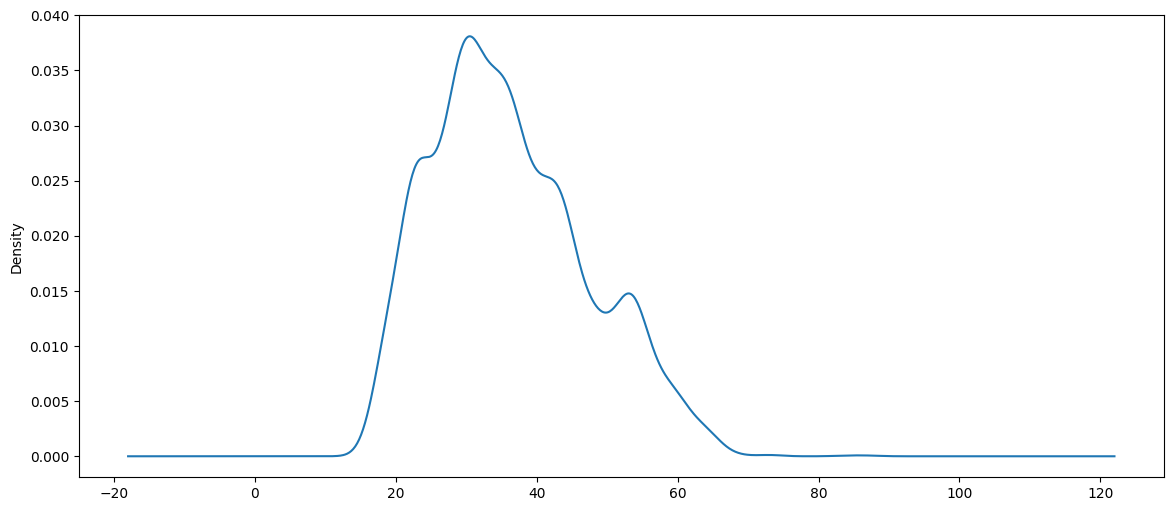

In [7]:
#Go ahead and show a density (KDE) and a box plot with the Customer_Age data:

sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

<Axes: >

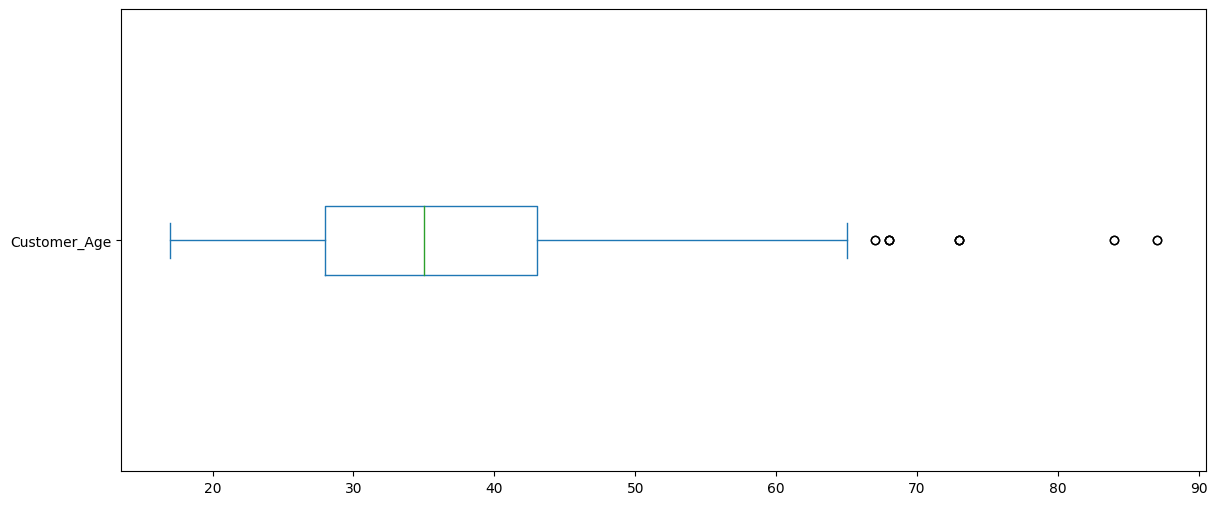

In [8]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

In [9]:
#What's the mean of Order_Quantity?
sales['Order_Quantity'].mean()

14.03559277676001